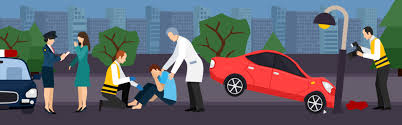

# Road Accident Severity Classification


In [1]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from imblearn.over_sampling import RandomOverSampler
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold # import KFold
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("RTA Dataset.csv")

#### Let's take a look at the dataset

In [3]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
7961,16:00:00,Friday,18-30,Male,Elementary school,Employee,5-10yr,Automobile,Governmental,NaN,...,Turnover,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
9810,9:25:00,Tuesday,Over 51,Male,Junior high school,Owner,5-10yr,NaN,Owner,Above 10yr,...,Going straight,Passenger,Female,31-50,3,NaN,NaN,Not a Pedestrian,No distancing,Slight Injury
8974,8:40:00,Wednesday,Over 51,Male,High school,Employee,2-5yr,Other,Owner,NaN,...,Getting off,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
3631,9:30:00,Tuesday,Unknown,Female,Junior high school,Employee,1-2yr,Public (12 seats),Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
4514,11:08:00,Thursday,18-30,Male,Junior high school,Employee,Below 1yr,Other,Owner,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury


In [228]:
df.shape

(12316, 32)

In [229]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [230]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [231]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [232]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [233]:
# convert the 'Date' column to datetime format
df['Time']= pd.to_datetime(df['Time'])

In [234]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12311    False
12312    False
12313    False
12314    False
12315    False
Length: 12316, dtype: bool

In [235]:
df.duplicated().sum()

0

In [236]:
df.groupby('Accident_severity').size()

Accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

## Data Preprocessing

In [237]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

#### We can summarize the table as:

Number of observations: 12316
Number of columns: 32
Memory Usage: 3.0+ MB
Number of int columns: 2
Number of object columns: 30
Number of columns with missing values: 16

### Numerical data analysis

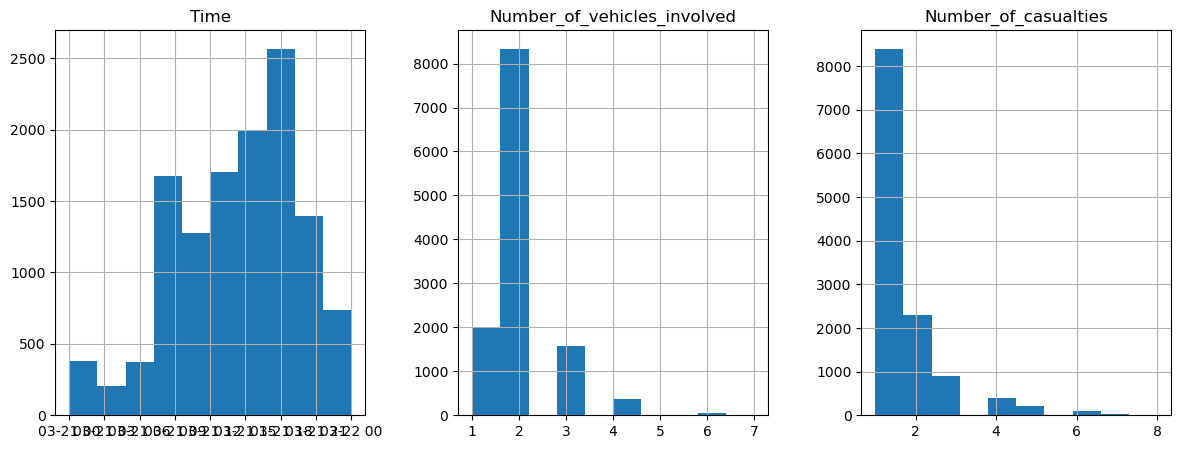

In [238]:
df.hist(layout=(1,6), figsize=(30,5))
plt.show()

In [239]:
df['Number_of_casualties'].value_counts()

Number_of_casualties
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64

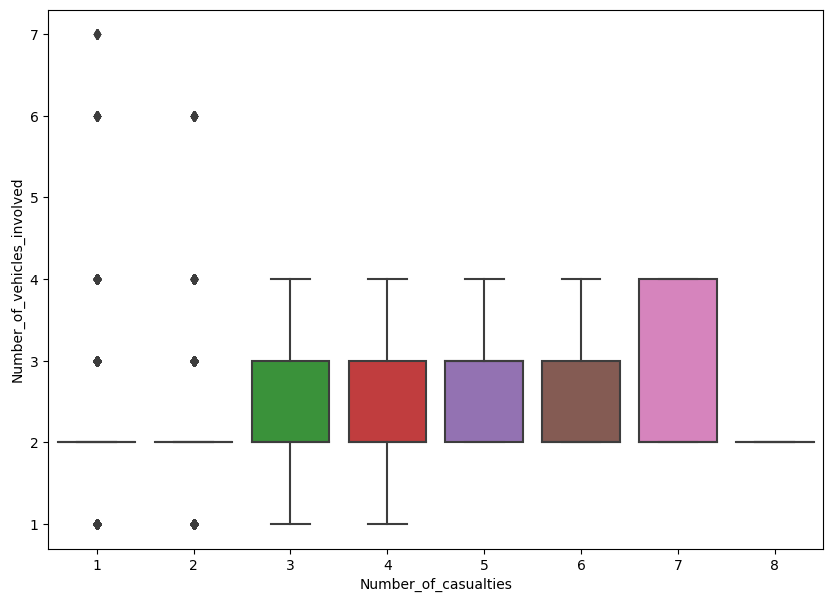

In [240]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

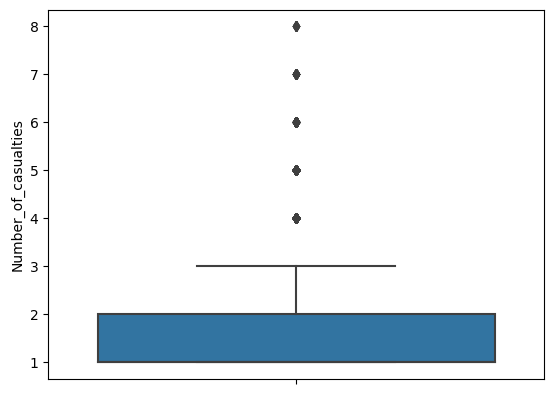

In [241]:
sns.boxplot(data=df, y='Number_of_casualties')
plt.show()

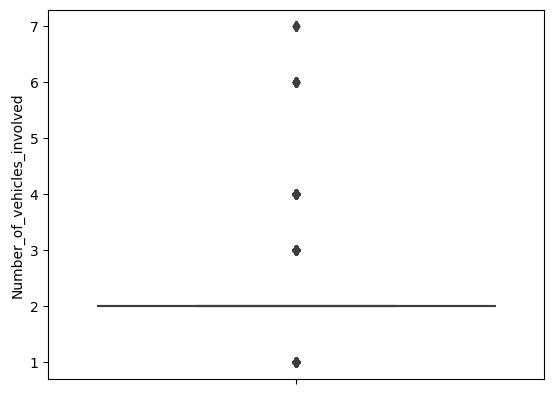

In [20]:
sns.boxplot(data=df, y='Number_of_vehicles_involved')
plt.show()

In [21]:
df['Number_of_vehicles_involved']

0        2
1        2
2        2
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Number_of_vehicles_involved, Length: 12316, dtype: int64

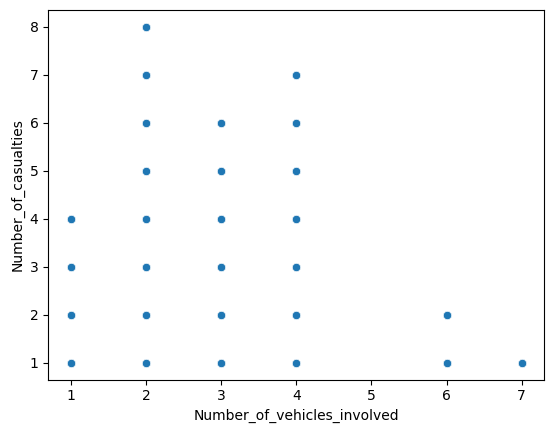

In [22]:
sns.scatterplot(x=df['Number_of_vehicles_involved'], y=df['Number_of_casualties'])
plt.show()

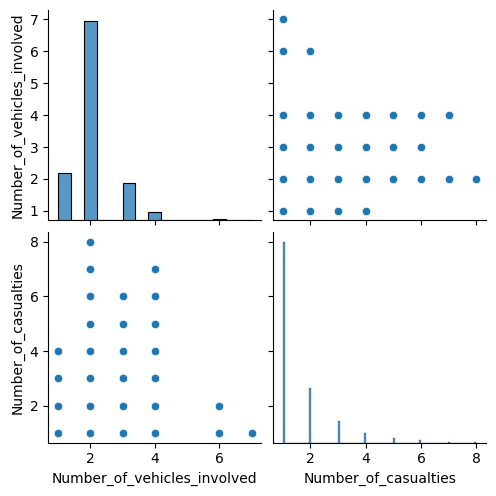

In [23]:
sns.pairplot(df[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

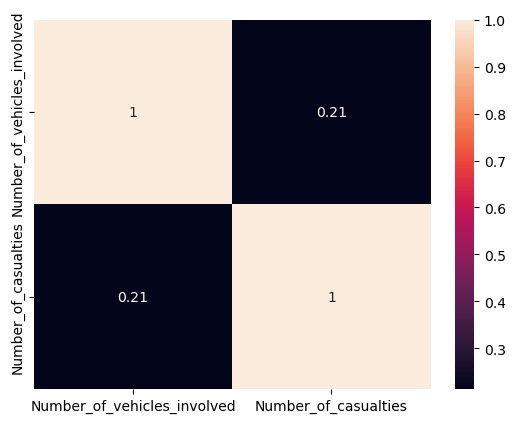

In [24]:
correlation_matrix = df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In this heatmap, we can find that these are not much extremely correlated variables

### Categorical data analysis

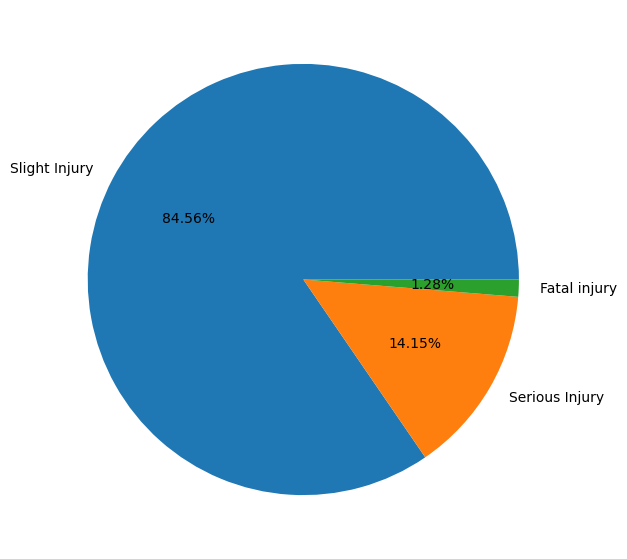

In [25]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Accident_severity'].value_counts().values,
        labels=df['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

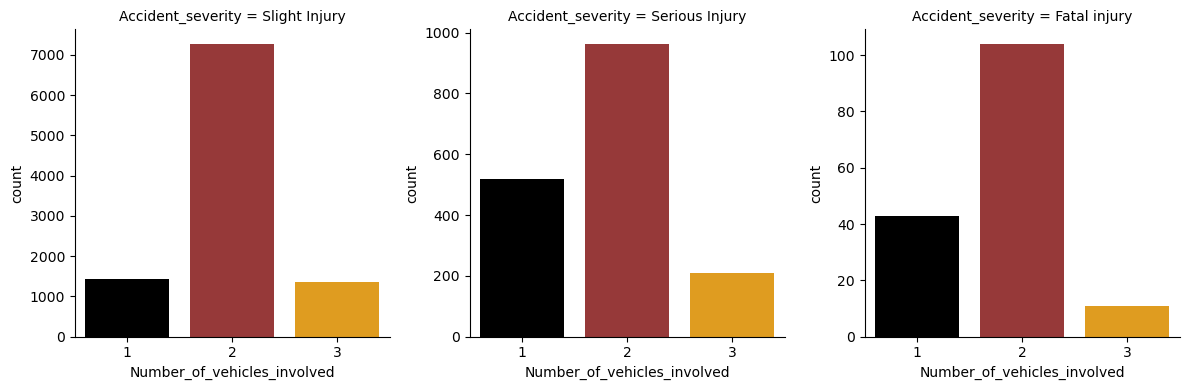

In [26]:
# creating a facet grid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=df, col='Accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

In [27]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [28]:
# dropping columns that can cause imbalance while imputation
lists=['Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality','Day_of_week','Casualty_severity','Time','Sex_of_driver','Educational_level','Defect_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle', 'Road_surface_type','Sex_of_casualty']
df.drop(columns = lists, inplace=True)

In [29]:
df.shape

(12316, 19)

In [30]:
df.columns

Index(['Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

### Filling missing values

In [31]:
# fill missing values with mode column values
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Age_band_of_driver'].fillna(df['Age_band_of_driver'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)

In [32]:
df.isnull().sum()

Age_band_of_driver             0
Driving_experience             0
Type_of_vehicle                0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Age_band_of_casualty           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

### Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder           #or one hot encoder
LE = LabelEncoder()
df=df.apply(LE.fit_transform)                            #categorical values to integers

<Axes: >

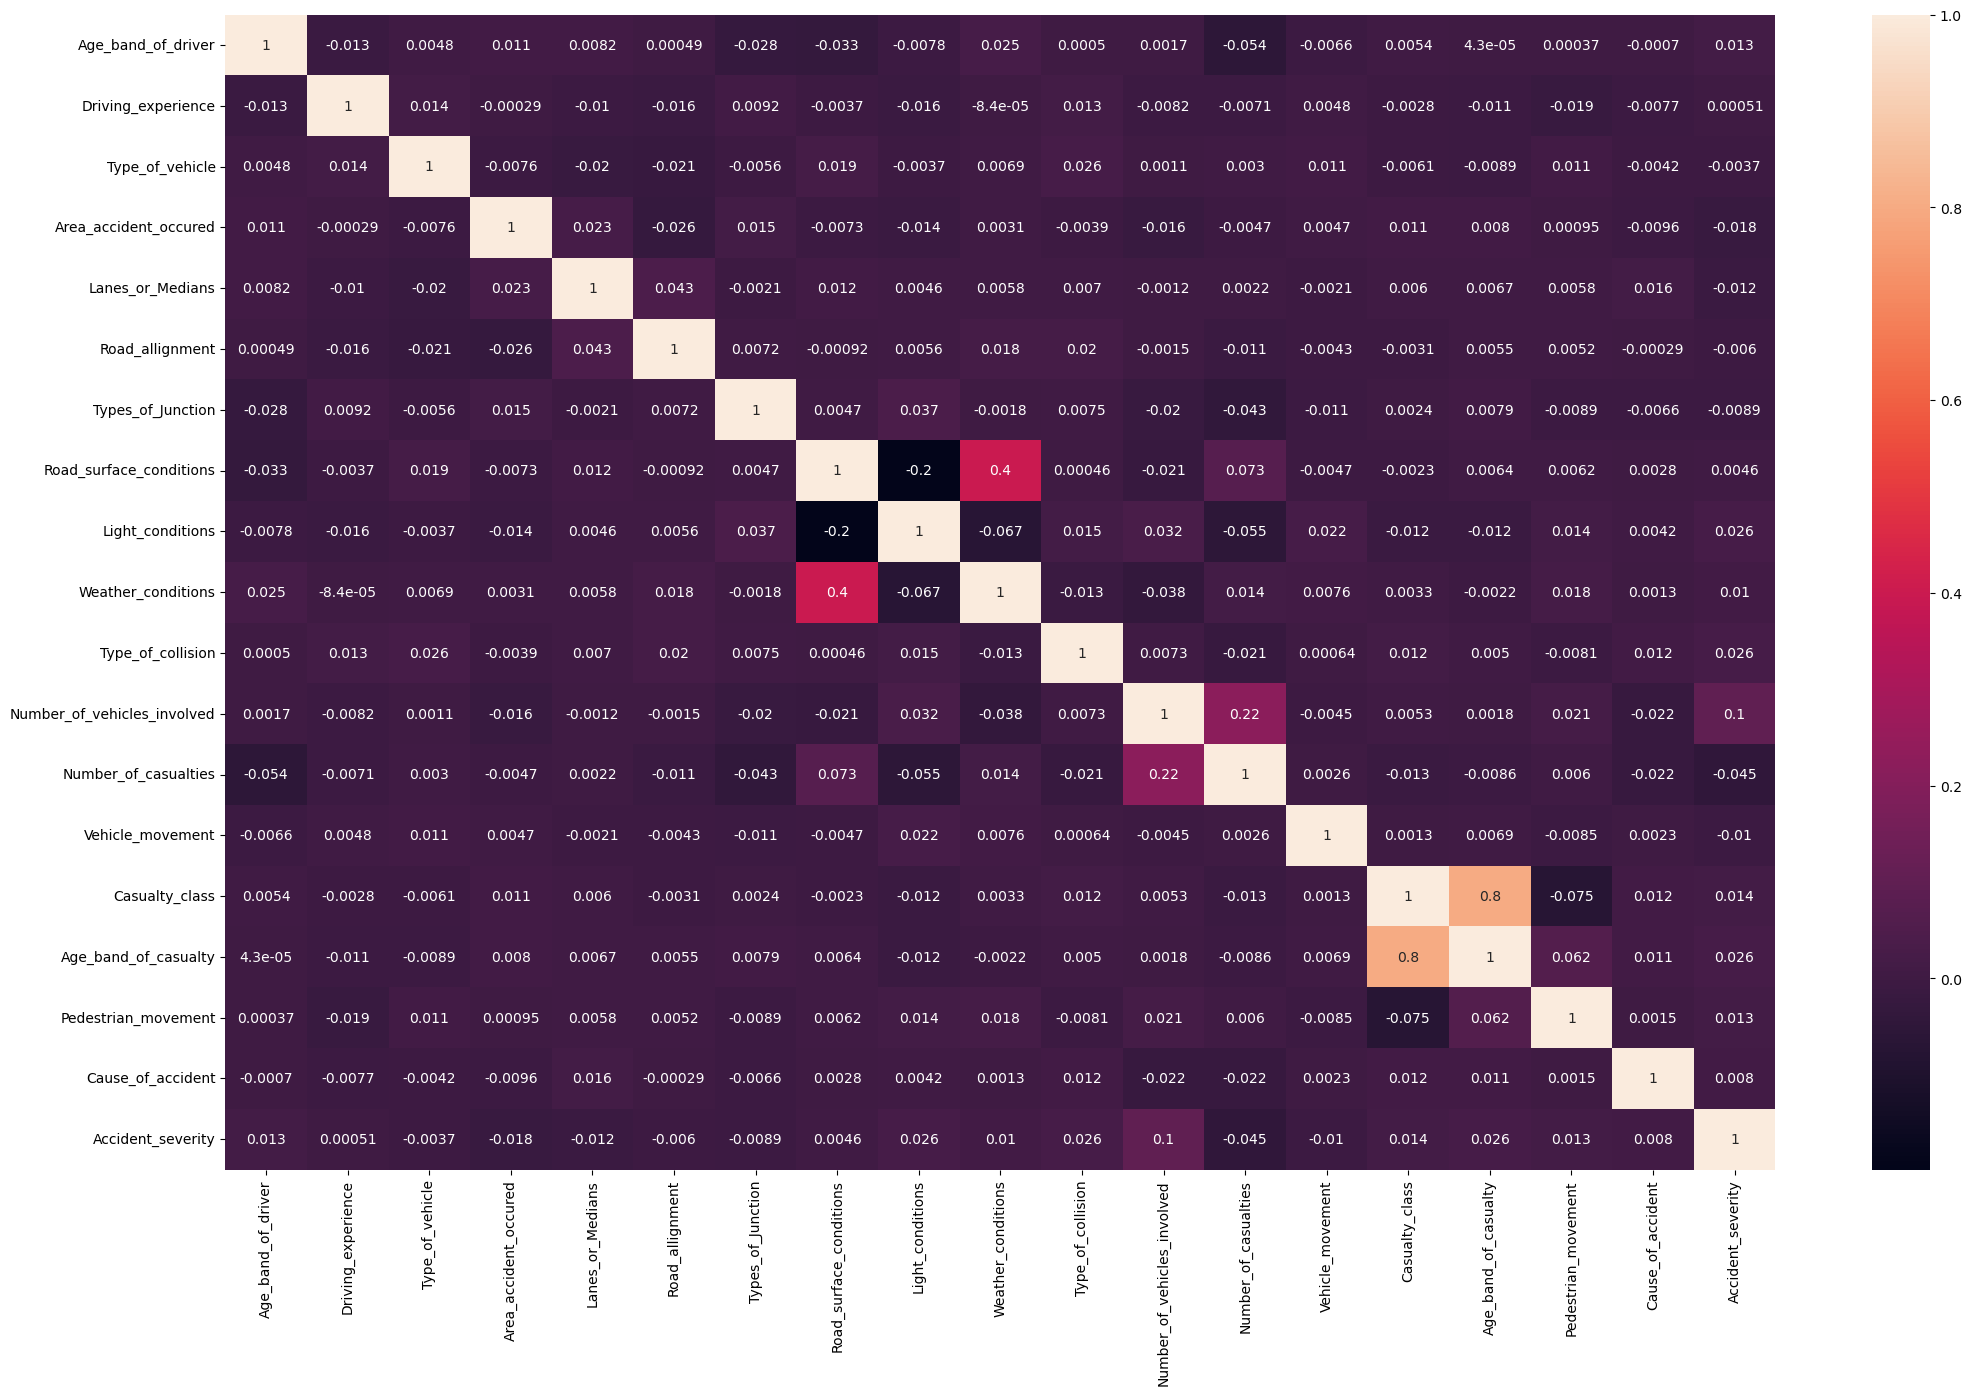

In [35]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True)

## Upsampling

In [261]:
from imblearn.over_sampling import RandomOverSampler

# Perform random oversampling
oversampler = RandomOverSampler(random_state=0)
xtrain_upsampled, ytrain_upsampled = oversampler.fit_resample(xtrain, ytrain)


## Splitting test and train data

In [262]:
x=df.drop(columns=["Accident_severity"])
y=df["Accident_severity"]

In [263]:
from sklearn.model_selection import train_test_split

# Train/Test Split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)


In [220]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Apply MinMaxScaler
scaler = MinMaxScaler()
xtrain_scaled_minmax = scaler.fit_transform(xtrain)
xtest_scaled_minmax = scaler.transform(xtest)

# Apply StandardScaler
scaler = StandardScaler()
xtrain_scaled_standard = scaler.fit_transform(xtrain)
xtest_scaled_standard = scaler.transform(xtest)


In [247]:
# defining function to check classification report accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

def fit_model(model):
    # Train the model
    model.fit(xtrain, ytrain)
    # Predict on the test data
    ypred = model.predict(xtest)
    # Calculate accuracy
    accuracy = accuracy_score(ytest, ypred)
    print("Accuracy:", accuracy)
    # Generate classification report
    report = classification_report(ytest, ypred)
    print("Classification Report:\n", report)


In [248]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
svm=SVC()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
adb=AdaBoostClassifier()
gbd=GradientBoostingClassifier()





In [249]:
fit_model(lr)

Accuracy: 0.84375
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.00      0.00      0.00       354
           2       0.84      1.00      0.92      2079

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.31      2464
weighted avg       0.71      0.84      0.77      2464



In [250]:
fit_model(dt)

Accuracy: 0.7353896103896104
Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.06      0.05        31
           1       0.23      0.28      0.25       354
           2       0.86      0.82      0.84      2079

    accuracy                           0.74      2464
   macro avg       0.38      0.39      0.38      2464
weighted avg       0.76      0.74      0.75      2464



In [251]:
fit_model(knn)

Accuracy: 0.825487012987013
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.16      0.03      0.05       354
           2       0.84      0.97      0.90      2079

    accuracy                           0.83      2464
   macro avg       0.34      0.33      0.32      2464
weighted avg       0.74      0.83      0.77      2464



In [252]:
nmodel(svm)

The Accuracy score : 0.84375
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.00      0.00      0.00       354
           2       0.84      1.00      0.92      2079

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.31      2464
weighted avg       0.71      0.84      0.77      2464



SVC()

In [255]:
nmodel(rfc)

The Accuracy score : 0.8457792207792207
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.61      0.04      0.07       354
           2       0.85      1.00      0.92      2079

    accuracy                           0.85      2464
   macro avg       0.49      0.35      0.33      2464
weighted avg       0.80      0.85      0.78      2464



RandomForestClassifier()

In [256]:
# grid search to find the best parameters
model=RandomForestClassifier()
params={"n_estimators" : [100,200],
        "criterion" : ["gini","entropy"]
        }
bestParams(model,params,xtrain,ytrain)

Best Parameters are  {'criterion': 'entropy', 'n_estimators': 100}
Best Accuracy is  0.7827070191760176


In [257]:
#retrain the model with best parameters
model=RandomForestClassifier(criterion="entropy",n_estimators=100)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

0.8465909090909091
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.65      0.04      0.08       354
           2       0.85      1.00      0.92      2079

    accuracy                           0.85      2464
   macro avg       0.50      0.35      0.33      2464
weighted avg       0.81      0.85      0.78      2464



<Axes: >

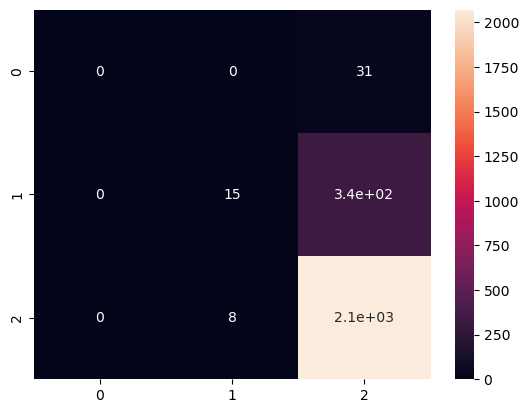

In [201]:
#final evaluation of the trained RandomForestClassifier model by calculating its accuracy score,generating a classification
#report, and visualizing the confusion matrix heatmap to assess its performance on the test datase
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [258]:
fit_model(adb)

Accuracy: 0.8425324675324676
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.00      0.00      0.00       354
           2       0.84      1.00      0.91      2079

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.71      0.84      0.77      2464



In [259]:
fit_model(gbd)

Accuracy: 0.8482142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.87      0.04      0.07       354
           2       0.85      1.00      0.92      2079

    accuracy                           0.85      2464
   macro avg       0.57      0.35      0.33      2464
weighted avg       0.84      0.85      0.78      2464



# Accuracy of all the models 

1. Logistic Regression : Accuracy Score: 84.37 
        
2. Desion tree   :   Accuracy Score:    72

3. K-Nearest Neighbors (KNN) : Accuracy Score: 83

4. Support Vector Machine (SVM) : Accuracy Score: 84

5.  Random Forest : Accuracy Score: 85

6. AdaBoostClassifier : Accuracy Score: 85

7. GradientBoostingClassifier :  Accuracy Score: 85


# Accuracy of all the models 

#   Conclusion 

Based on the provided accuracy scores, the algorithms with the highest accuracy scores are:

Random Forest: Accuracy Score: 85%
AdaBoostClassifier: Accuracy Score: 85%
GradientBoostingClassifier: Accuracy Score: 85%
All three of these algorithms achieved an accuracy score of 85%, making them tied for the highest accuracy among the listed algorithms.